In [1]:
import random
from typing import cast

import numpy as np
from combine import CombineMethod, combine_bns, combine_bns_weighted
from pandas import DataFrame
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
from pgmpy.sampling import BayesianModelSampling
from pgmpy.utils import get_example_model
from util import calc_accuracy, print_bn


np.random.seed(42)
random.seed(42)

## Figure 4 Example

+------+----------+
| A(0) | 0.182059 |
+------+----------+
| A(1) | 0.462129 |
+------+----------+
| A(2) | 0.355812 |
+------+----------+

+------+---------------------+----------------------+---------------------+
| A    | A(0)                | A(1)                 | A(2)                |
+------+---------------------+----------------------+---------------------+
| C(0) | 0.43863719780484467 | 0.14961808635635374  | 0.09032586533747758 |
+------+---------------------+----------------------+---------------------+
| C(1) | 0.04255787490260796 | 0.8306418836291715   | 0.3480650056555381  |
+------+---------------------+----------------------+---------------------+
| C(2) | 0.5188049272925475  | 0.019740030014474753 | 0.5616091290069843  |
+------+---------------------+----------------------+---------------------+

+------+---------------------+--------------------+---------------------+
| C    | C(0)                | C(1)               | C(2)                |
+------+------------------

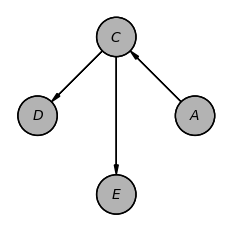

In [2]:
bn1_fig4 = BayesianNetwork([('A', 'C'), ('C', 'D'), ('C', 'E')])
bn1_fig4.get_random_cpds(3, inplace=True)

print_bn(bn1_fig4)

+------+-----------+
| B(0) | 0.720591  |
+------+-----------+
| B(1) | 0.202254  |
+------+-----------+
| B(2) | 0.0771557 |
+------+-----------+

+------+---------------------+---------------------+---------------------+
| B    | B(0)                | B(1)                | B(2)                |
+------+---------------------+---------------------+---------------------+
| D(0) | 0.5602601060974629  | 0.8146439778064642  | 0.4066779281484738  |
+------+---------------------+---------------------+---------------------+
| D(1) | 0.17985619543725556 | 0.08239991710049592 | 0.3442149708198153  |
+------+---------------------+---------------------+---------------------+
| D(2) | 0.25988369846528153 | 0.10295610509303986 | 0.24910710103171085 |
+------+---------------------+---------------------+---------------------+

+------+-----------+
| C(0) | 0.0285978 |
+------+-----------+
| C(1) | 0.756199  |
+------+-----------+
| C(2) | 0.215204  |
+------+-----------+

+------+--------------------

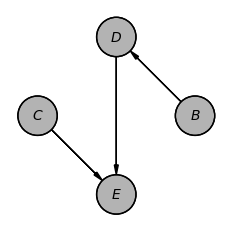

In [3]:
bn2_fig4 = BayesianNetwork([('B', 'D'), ('C', 'E'), ('D', 'E')])
bn2_fig4.get_random_cpds(3, inplace=True)

print_bn(bn2_fig4)

+------+----------+
| A(0) | 0.182059 |
+------+----------+
| A(1) | 0.462129 |
+------+----------+
| A(2) | 0.355812 |
+------+----------+

+------+---------------------+----------------------+---------------------+
| A    | A(0)                | A(1)                 | A(2)                |
+------+---------------------+----------------------+---------------------+
| C(0) | 0.43863719780484467 | 0.14961808635635374  | 0.09032586533747758 |
+------+---------------------+----------------------+---------------------+
| C(1) | 0.04255787490260796 | 0.8306418836291715   | 0.3480650056555381  |
+------+---------------------+----------------------+---------------------+
| C(2) | 0.5188049272925475  | 0.019740030014474753 | 0.5616091290069843  |
+------+---------------------+----------------------+---------------------+

+------+---------------------+---------------------+---------------------+
| B    | B(0)                | B(1)                | B(2)                |
+------+----------------

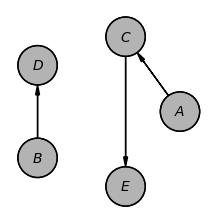

In [4]:
bn_combined_fig4 = combine_bns([bn1_fig4, bn2_fig4], CombineMethod.SINGLE)

print_bn(bn_combined_fig4)

## Figure 5 Example

+-------+-------+-------+
| E     | E(e1) | E(e2) |
+-------+-------+-------+
| D(d1) | 0.3   | 0.6   |
+-------+-------+-------+
| D(d2) | 0.7   | 0.4   |
+-------+-------+-------+

+-------+------------+
| E(e1) | 0.00672622 |
+-------+------------+
| E(e2) | 0.993274   |
+-------+------------+



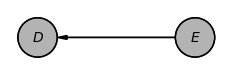

In [5]:
bn1_fig5 = BayesianNetwork([('E', 'D')])
d_cpd1_fig5 = TabularCPD(variable='D', variable_card=2, values=[[0.3, 0.6], [0.7, 0.4]], evidence=['E'], evidence_card=[2], state_names={'D': ['d1', 'd2'], 'E': ['e1', 'e2']})
bn1_fig5.add_cpds(d_cpd1_fig5)
e_cpd1_fig5 = TabularCPD.get_random(variable='E', cardinality={'E': 2}, state_names={'E': ['e1', 'e2']})
bn1_fig5.add_cpds(e_cpd1_fig5)

print_bn(bn1_fig5)

+-------+-------+-------+
| F     | F(f1) | F(f2) |
+-------+-------+-------+
| D(d1) | 0.8   | 0.6   |
+-------+-------+-------+
| D(d2) | 0.2   | 0.4   |
+-------+-------+-------+

+-------+----------+
| F(f1) | 0.492287 |
+-------+----------+
| F(f2) | 0.507713 |
+-------+----------+



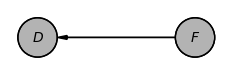

In [6]:
bn2_fig5 = BayesianNetwork([('F', 'D')])
d_cpd2_fig5 = TabularCPD(variable='D', variable_card=2, values=[[0.8, 0.6], [0.2, 0.4]], evidence=['F'], evidence_card=[2], state_names={'D': ['d1', 'd2'], 'F': ['f1', 'f2']})
bn2_fig5.add_cpds(d_cpd2_fig5)
f_cpd2_fig5 = TabularCPD.get_random(variable='F', cardinality={'F': 2}, state_names={'F': ['f1', 'f2']})
bn2_fig5.add_cpds(f_cpd2_fig5)

print_bn(bn2_fig5)

+-------+------------+
| E(e1) | 0.00672622 |
+-------+------------+
| E(e2) | 0.993274   |
+-------+------------+

+-------+--------------------+--------------------+---------------------+---------------------+
| E     | E(e1)              | E(e1)              | E(e2)               | E(e2)               |
+-------+--------------------+--------------------+---------------------+---------------------+
| F     | F(f1)              | F(f2)              | F(f1)               | F(f2)               |
+-------+--------------------+--------------------+---------------------+---------------------+
| D(d1) | 0.5308641975308642 | 0.4675324675324675 | 0.6388888888888888  | 0.5675675675675675  |
+-------+--------------------+--------------------+---------------------+---------------------+
| D(d2) | 0.4691358024691357 | 0.5324675324675325 | 0.36111111111111116 | 0.43243243243243246 |
+-------+--------------------+--------------------+---------------------+---------------------+

+-------+----------

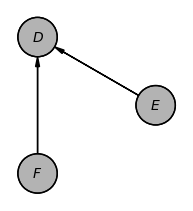

In [7]:
bn_combined_fig5 = combine_bns([bn1_fig5, bn2_fig5], CombineMethod.SINGLE)

print_bn(bn_combined_fig5)

## ASIA network

+-----------+------+
| asia(yes) | 0.01 |
+-----------+------+
| asia(no)  | 0.99 |
+-----------+------+

+------------+------------+-----------+
| smoke      | smoke(yes) | smoke(no) |
+------------+------------+-----------+
| bronc(yes) | 0.6        | 0.3       |
+------------+------------+-----------+
| bronc(no)  | 0.4        | 0.7       |
+------------+------------+-----------+

+-----------+-------------+------------+-------------+------------+
| bronc     | bronc(yes)  | bronc(yes) | bronc(no)   | bronc(no)  |
+-----------+-------------+------------+-------------+------------+
| either    | either(yes) | either(no) | either(yes) | either(no) |
+-----------+-------------+------------+-------------+------------+
| dysp(yes) | 0.9         | 0.8        | 0.7         | 0.1        |
+-----------+-------------+------------+-------------+------------+
| dysp(no)  | 0.1         | 0.2        | 0.3         | 0.9        |
+-----------+-------------+------------+-------------+------------+



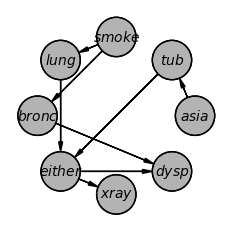

In [8]:
asia_model = get_example_model("asia")

print_bn(asia_model)

+-----------+------+
| asia(yes) | 0.01 |
+-----------+------+
| asia(no)  | 0.99 |
+-----------+------+

+------------+-----+
| smoke(yes) | 0.5 |
+------------+-----+
| smoke(no)  | 0.5 |
+------------+-----+

+----------+-----------+----------+
| asia     | asia(yes) | asia(no) |
+----------+-----------+----------+
| tub(yes) | 0.05      | 0.01     |
+----------+-----------+----------+
| tub(no)  | 0.95      | 0.99     |
+----------+-----------+----------+

+-----------+------------+-----------+
| smoke     | smoke(yes) | smoke(no) |
+-----------+------------+-----------+
| lung(yes) | 0.1        | 0.01      |
+-----------+------------+-----------+
| lung(no)  | 0.9        | 0.99      |
+-----------+------------+-----------+

+-------------+----------+---------+
| tub         | tub(yes) | tub(no) |
+-------------+----------+---------+
| either(yes) | 1.0      | 0.5     |
+-------------+----------+---------+
| either(no)  | 0.0      | 0.5     |
+-------------+----------+---------+



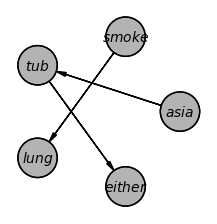

In [9]:
bn1_asia = BayesianNetwork()
bn1_asia_nodes = ['asia', 'smoke', 'tub', 'lung', 'either']
bn1_asia.add_nodes_from(bn1_asia_nodes)
for node in bn1_asia_nodes:
    if node == 'either':
        bn1_asia.add_edge('tub', node)
        bn1_asia.add_cpds(cast(TabularCPD, asia_model.get_cpds(node)).marginalize(['lung'], inplace=False))
    else:
        bn1_asia.add_edges_from([(p, node) for p in asia_model.get_parents(node)])
        bn1_asia.add_cpds(asia_model.get_cpds(node) or [])

print_bn(bn1_asia)

+------------+------+
| bronc(yes) | 0.45 |
+------------+------+
| bronc(no)  | 0.55 |
+------------+------+

+-----------+-------------+------------+-------------+------------+
| bronc     | bronc(yes)  | bronc(yes) | bronc(no)   | bronc(no)  |
+-----------+-------------+------------+-------------+------------+
| either    | either(yes) | either(no) | either(yes) | either(no) |
+-----------+-------------+------------+-------------+------------+
| dysp(yes) | 0.9         | 0.8        | 0.7         | 0.1        |
+-----------+-------------+------------+-------------+------------+
| dysp(no)  | 0.1         | 0.2        | 0.3         | 0.9        |
+-----------+-------------+------------+-------------+------------+

+-------------+-----------+-----------+----------+----------+
| lung        | lung(yes) | lung(yes) | lung(no) | lung(no) |
+-------------+-----------+-----------+----------+----------+
| tub         | tub(yes)  | tub(no)   | tub(yes) | tub(no)  |
+-------------+-----------+-

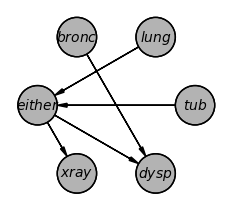

In [10]:
bn2_asia = asia_model.copy()
bn2_asia.remove_nodes_from(['asia', 'smoke'])

print_bn(bn2_asia)

+-----------+------+
| asia(yes) | 0.01 |
+-----------+------+
| asia(no)  | 0.99 |
+-----------+------+

+------------+-----+
| smoke(yes) | 0.5 |
+------------+-----+
| smoke(no)  | 0.5 |
+------------+-----+

+----------+-----------+----------+
| asia     | asia(yes) | asia(no) |
+----------+-----------+----------+
| tub(yes) | 0.05      | 0.01     |
+----------+-----------+----------+
| tub(no)  | 0.95      | 0.99     |
+----------+-----------+----------+

+-----------+------------+-----------+
| smoke     | smoke(yes) | smoke(no) |
+-----------+------------+-----------+
| lung(yes) | 0.1        | 0.01      |
+-----------+------------+-----------+
| lung(no)  | 0.9        | 0.99      |
+-----------+------------+-----------+

+-------------+----------+---------+
| tub         | tub(yes) | tub(no) |
+-------------+----------+---------+
| either(yes) | 1.0      | 0.5     |
+-------------+----------+---------+
| either(no)  | 0.0      | 0.5     |
+-------------+----------+---------+

+

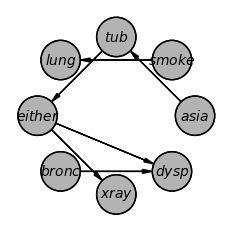

In [11]:
bn_combined_asia_eq = combine_bns_weighted({bn1_asia: 1, bn2_asia: 1}, CombineMethod.SINGLE)

print_bn(bn_combined_asia_eq)

+-----------+------+
| asia(yes) | 0.01 |
+-----------+------+
| asia(no)  | 0.99 |
+-----------+------+

+------------+-----+
| smoke(yes) | 0.5 |
+------------+-----+
| smoke(no)  | 0.5 |
+------------+-----+

+----------+-----------+----------+
| asia     | asia(yes) | asia(no) |
+----------+-----------+----------+
| tub(yes) | 0.05      | 0.01     |
+----------+-----------+----------+
| tub(no)  | 0.95      | 0.99     |
+----------+-----------+----------+

+-----------+------------+-----------+
| smoke     | smoke(yes) | smoke(no) |
+-----------+------------+-----------+
| lung(yes) | 0.1        | 0.01      |
+-----------+------------+-----------+
| lung(no)  | 0.9        | 0.99      |
+-----------+------------+-----------+

+-------------+-----------+-----------+----------+----------+
| lung        | lung(yes) | lung(yes) | lung(no) | lung(no) |
+-------------+-----------+-----------+----------+----------+
| tub         | tub(yes)  | tub(no)   | tub(yes) | tub(no)  |
+------------

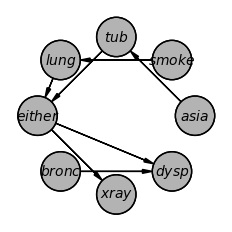

In [12]:
bn_combined_asia_wt = combine_bns_weighted({bn1_asia: 0.3, bn2_asia: 0.7}, CombineMethod.SINGLE)

print_bn(bn_combined_asia_wt)

In [13]:
samples = BayesianModelSampling(asia_model).forward_sample(size=1000, show_progress=False)
e_vars = ['asia', 'smoke']
q_vars = ['xray', 'dysp']
print('Eq Accs -', calc_accuracy(samples, bn_combined_asia_eq, e_vars, q_vars))
print('Wt Accs -', calc_accuracy(samples, bn_combined_asia_wt, e_vars, q_vars))

Eq Accs - {'xray': 10.8, 'dysp': 44.800000000000004}
Wt Accs - {'xray': 89.2, 'dysp': 55.2}
